# Twitter 1.6 million tweets Sentiment Analysis

The Sentiment140 dataset is an excellent resource for those interested in performing sentiment analysis of Twitter data. It contains 1.6 million tweets pre-classified as either positive or negative. This dataset is well suited to machine learning approaches as it contains a large number of easily accessible features, such as tweet text, user profile information, and sentiment. The challenge associated with this dataset is that the tweets can be full of slang, abbreviations, and other language features that are difficult for machines to interpret.


Each tweet in the dataset has several features, including the following:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)


We will use supervised and unsupervised learning methods to evaluate this dataset based on various machine learning theories. In particular, we will explore how well these models can predict the sentiment label of each tweet based on its text. We will also examine various NLP techniques that can be used to preprocess the text data and improve the performance of our models.

Overall, this dataset provides an excellent opportunity to explore the application of NLP methods to real-world data. By analyzing this data, we can gain insights into how people express sentiment on social media and develop models that can accurately classify the sentiment of new tweets.



In [1]:
# Import the Necessary Dependencies

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample



In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('twitter_data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

#Exploratory Data Analysis
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
print('length of data is', len(df))


length of data is 1600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [6]:
#Checking for null values
np.sum(df.isnull().any(axis=1))

0

In [7]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [8]:
#Check unique target values
df['target'].unique()

array([0, 4], dtype=int64)

In [9]:
#Check the number of target values
df['target'].nunique()

2

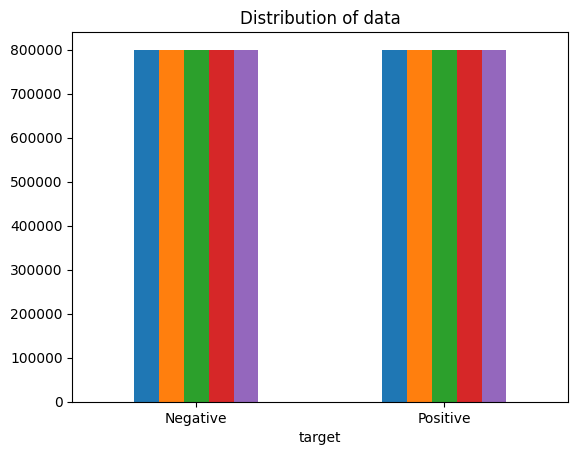

In [10]:
# Data Visualization of Target Variables

# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

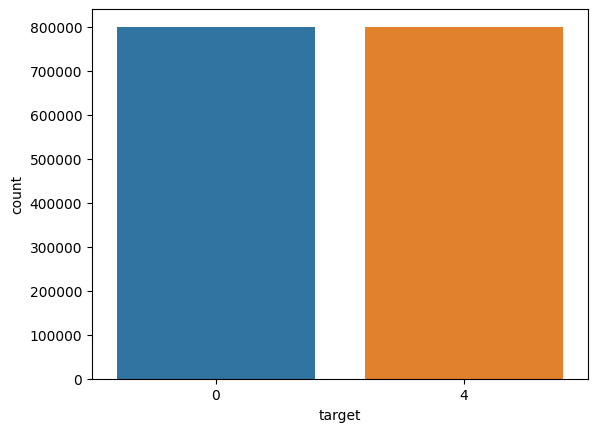

In [11]:
sns.countplot(x='target', data=df)

In [12]:
df['text'].tail()

1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, dtype: object

In [13]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()
df['text'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [14]:
#Cleaning and removing punctuations

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [15]:
#Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [16]:
#Cleaning and removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [17]:
#Cleaning and removing numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [18]:
# Removing # and @ characters from tweets and other symbols

def cleaning_characters(data):
    return re.sub(r'\@\w+|\#|\'|\"|\´|\`|\,','', data)
df['text'] = df['text'].apply(lambda x: cleaning_characters(x))
df['text'].tail()


1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [19]:
#Defining set containing all stopwords in English.

nltk.download ('stopwords')
stop_words = set(stopwords.words( 'english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thamires\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#Cleaning and removing the above stop words list from the tweet text

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].tail()


1599995                        woke school best feeling ever
1599996    thewdbcom cool hear old walt interviews â« ht...
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [21]:
# Count the words used per user

def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['text'].apply(word_count)
df.tail()

,target,ids,date,flag,user,text,word count
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever,5
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews â« ht...,8
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask details,5
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...,9
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday thenspcc sparkscharity sp...,5


In [22]:
# Doing tokenization of Tweet Text

tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)
df['text'].tail()

1599995                  [woke, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text, dtype: object

In [23]:
# Stemming process

st = nltk.PorterStemmer()
def stemming_process(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_process(x))
df['text'].tail()



1599995                  [woke, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text, dtype: object

In [24]:
# Lemmatizer Proccess

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].tail()

1599995                  [woke, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text, dtype: object

In [25]:
# count = 0
# for index, row in df.iterrows():
#     if row['target'] != count:
#         print(index-1)
#         count +=2

# where start and where ends negative and positive


In [26]:
# Separating positive and negative tweets

data_pos = df[df['target'] == 4]
data_neg = df[df['target'] == 0]
df = pd.concat([data_neg, data_pos])
data_neg.tail()


,target,ids,date,flag,user,text,word count
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,"[sick, spending, day, laying, bed, listening, ...",7
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,[gmail],1
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,"[rest, peace, farrah, sad]",4
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,"[ericurbane, sounds, like, rival, flagging, ad...",8
799999,0,2329205794,Thu Jun 25 10:28:31 PDT 2009,NO_QUERY,tpchandler,"[resit, exams, summer, wishes, worked, harder,...",9


In [27]:
data_pos.tail()

,target,ids,date,flag,user,text,word count
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,"[woke, school, best, feeling, ever]",5
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,"[thewdbcom, cool, hear, old, walt, interviews,...",8
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,"[ready, mojo, makeover, ask, details]",5
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,"[happy, th, birthday, boo, alll, time, tupac, ...",9
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,"[happy, charitytuesday, thenspcc, sparkscharit...",5


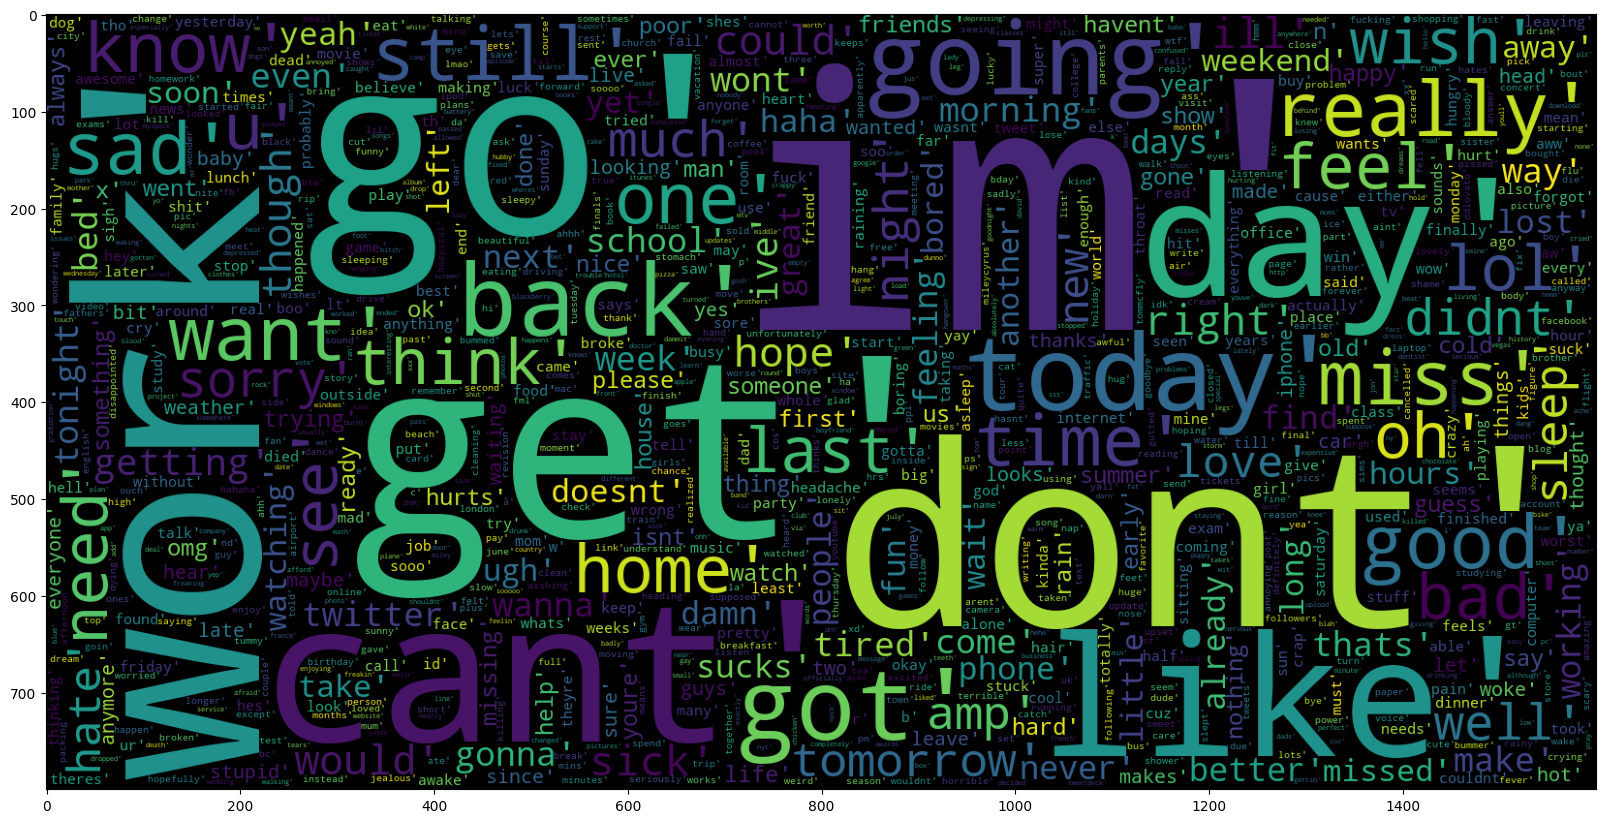

In [28]:
# Plot words of negative tweets

data_neg1 = df['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(map(str,data_neg1)))
plt.imshow(wc)

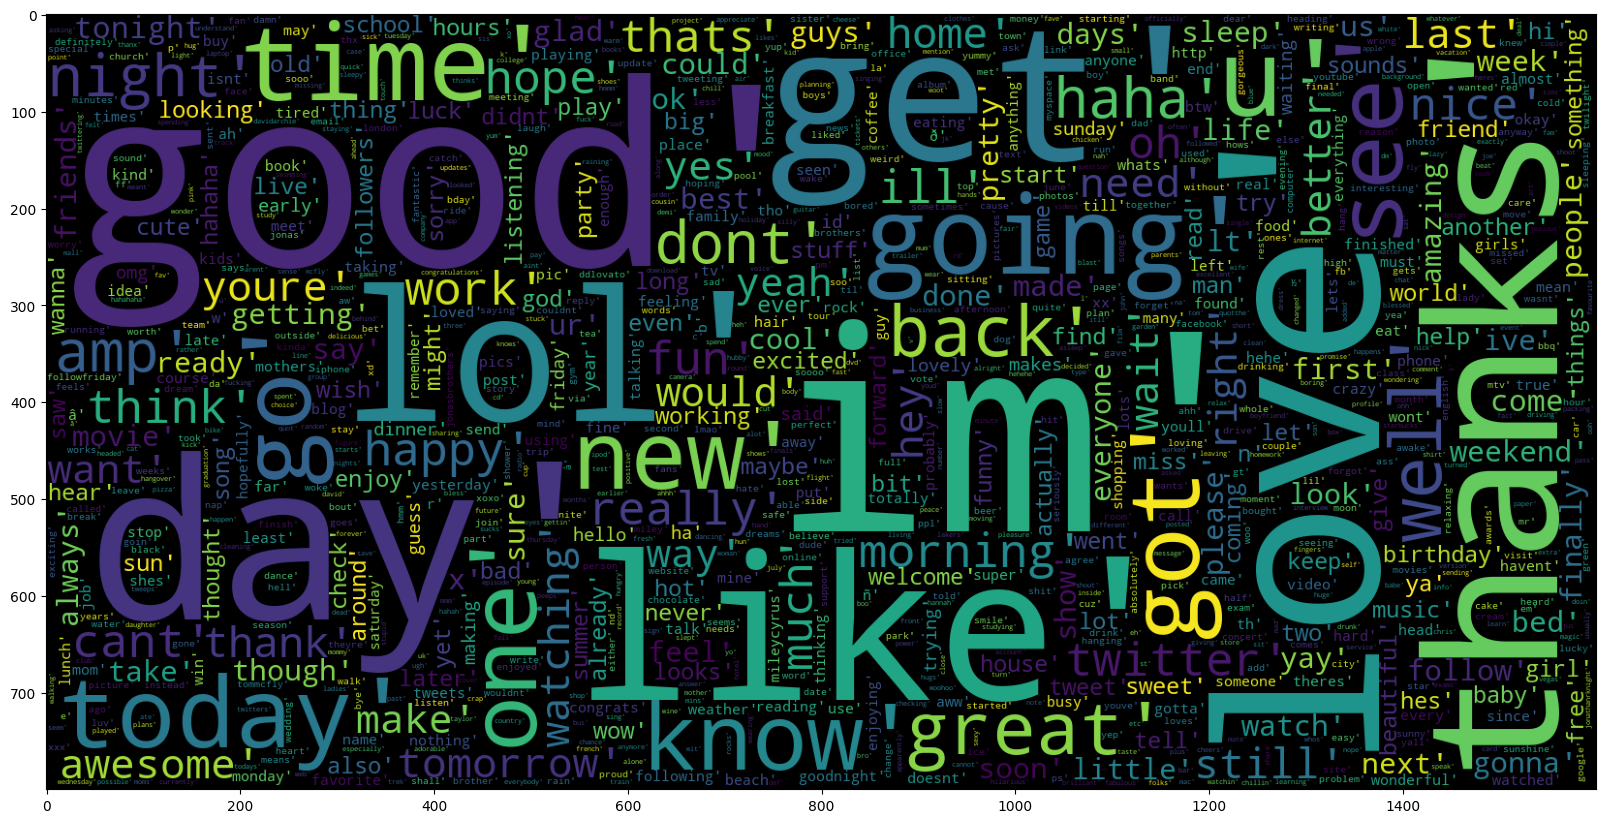

In [29]:
# Plot tweets of positive tweets

data_pos1 = df['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(map(str, data_pos1)))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [30]:
# Separate the date into train and test subset

df_all = pd.read_csv('twitter_data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
X1 = df.copy()
X = X1.drop('target', axis=1)  # Predictor feature columns
y = df_all['target']   # Predicted class (1=True, 0=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) 
# 0.3 is the proportion of the data to allocate to the test set 
#the random seed used to split the data. This ensures that the same random split is used every time the code is run.

X_train.tail()


,ids,date,flag,user,text,word count
843474,1563883491,Mon Apr 20 00:42:30 PDT 2009,NO_QUERY,elisepea24,"[watching, twilight, ilove, movie, hehe]",5
755432,2288322513,Mon Jun 22 19:00:42 PDT 2009,NO_QUERY,courtnoel,"[betsysharp, im, watching, right, sad, especia...",11
1287881,2002419597,Tue Jun 02 04:09:33 PDT 2009,NO_QUERY,taylahrobb,"[tracecyrus, awesome, pic]",3
1225913,1990755518,Mon Jun 01 05:40:06 PDT 2009,NO_QUERY,LizArgument,"[stephjc, yeh, im, fine, feel, bit, like, mad,...",14
1596451,2192653861,Tue Jun 16 07:21:21 PDT 2009,NO_QUERY,deysicastaneda,"[im, work, eating, anas, candy, one, cause, ge...",11


In [31]:
# # Balancing the training set


# # Assuming X_train and y_train are your feature and target variable respectively
# # Split the training data into majority and minority classes
X_majority = X_train[y_train==0]
X_minority = X_train[y_train==4]

# # Undersample the majority class by selecting the same number of samples as there are in the minority class
X_majority_downsampled = resample(X_majority,
                                  replace=True,
                                  n_samples=len(X_minority),
                                  random_state=42)

# # # Combine the minority class and downsampled majority class samples
X_train = np.concatenate((X_majority_downsampled, X_minority))
y_train = np.concatenate((np.zeros(len(X_majority_downsampled)), np.ones(len(X_minority))))

In [32]:
print(('X_train shape =', X_train.shape), ('y_train shape =', y_train.shape), ('X_test shape =', X_test.shape), ('y_test shape =', y_test.shape))

('X_train shape =', (1280610, 6)) ('y_train shape =', (1280610,)) ('X_test shape =', (320000, 6)) ('y_test shape =', (320000,))


## code explanation

This code is trying to balance the number of samples in the two classes (majority and minority) in a dataset. The dataset has features (X_train) and targets (y_train), where y_train=0 represents the majority class and y_train=4 represents the minority class.

To balance the dataset, the code first separates the majority and minority classes based on their target values. The majority class features are stored in a variable called X_majority, and the minority class features are stored in a variable called X_minority.

Next, the majority class is undersampled by selecting the same number of samples as there are in the minority class. This is done using the resample() function with the following parameters: X_majority (features of majority class), replace=False (no replacement), n_samples=len(X_minority) (selecting the same number of samples as minority class), and random_state=42 (for reproducibility).

Finally, the downsampled majority class and the minority class are combined to create a balanced training dataset. This is done by concatenating the downsampled majority class and minority class features and targets using the numpy concatenate() function. The target values for the downsampled majority class are set to 0 (majority class) using np.zeros() function, and the target values for the minority class are set to 4 (minority class) using np.ones() function. The balanced features and targets are stored in X_train_balanced and y_train_balanced variables, respectively.

You can set any integer value for random_state. The choice of the specific number, in this case, 42, is arbitrary.

The number 42 is sometimes used in computer science and related fields as a "random" number. It is a reference to the book "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, in which the number 42 is famously described as the "Answer to the Ultimate Question of Life, the Universe, and Everything."

In reality, there is nothing special about the number 42, and any other integer value can be used instead. The important thing is to use a fixed value for random_state in order to achieve reproducibility.

In [44]:
# Save train and test dataframes into csv

np.savetxt('X_train.csv', X_train, delimiter=',', fmt='%s')
np.savetxt('X_test.csv', X_train, delimiter=',', fmt='%s')
np.savetxt('y_train.csv', X_train, delimiter=',', fmt='%s')
np.savetxt('y_test.csv', X_train, delimiter=',', fmt='%s')